(100, 100, 3)


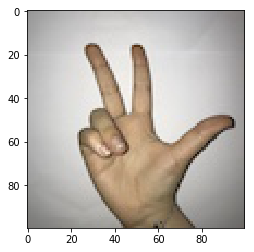

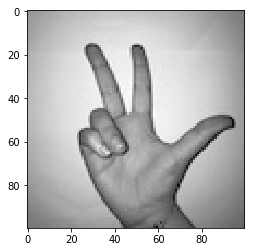

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import skimage
from copy import copy,deepcopy
from scipy import ndimage
from skimage.io import imread
from skimage.io import imshow
%matplotlib inline
import numpy as np
from skimage.data import camera
from skimage import color,feature

colorimage = imread('example_3.jpg')
print(colorimage.shape)
plt.figure()
plt.imshow(colorimage)

img_gray = color.rgb2gray(colorimage)
plt.figure()
plt.imshow(img_gray,cmap ='gray')

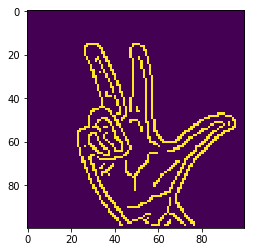

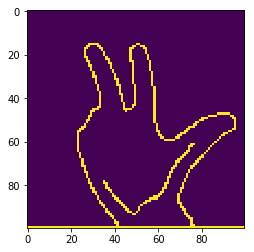

In [15]:
edges1=feature.canny(img_gray) #canny edge only 0 or 1
edges2=feature.canny(img_gray,sigma=3) #more sigma more blur reduce noise
plt.figure()
plt.imshow(edges1)
plt.figure()
plt.imshow(edges2)
edges2[99:,:]=1
plt.imshow(edges2)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


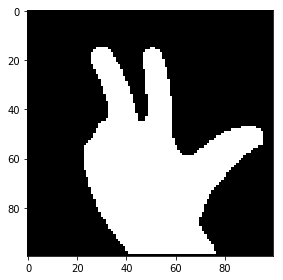

In [16]:
from scipy.ndimage.morphology import binary_fill_holes
filled_I = binary_fill_holes(edges2)
imshow(filled_I)
filled_I[99:,:]=0
imshow(filled_I)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


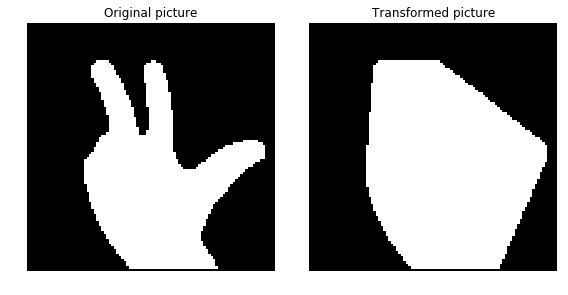

In [17]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.

chull = convex_hull_image(filled_I)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(filled_I, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_axis_off()

print(chull)
plt.tight_layout()
plt.show()

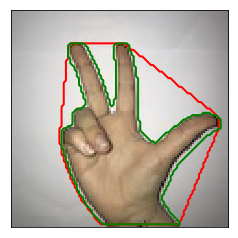

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(chull, 0.9)
contours1 = measure.find_contours(filled_I, 0.9)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(colorimage, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
     
for n, contour in enumerate(contours1):    
    ax.plot(contour[:, 1], contour[:, 0], color='green', linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [335]:
import cv2
import skimage

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


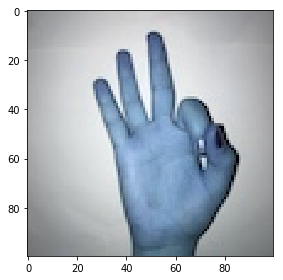

In [363]:
img = cv2.imread('example_9.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow(img)


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


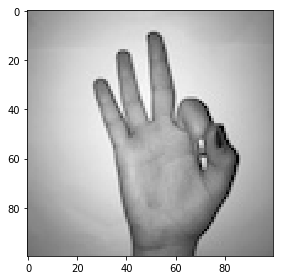

In [364]:
imshow(img_gray)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


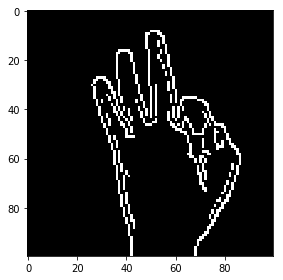

In [365]:
edges = cv2.Canny(img_gray,100,200)
ret,thresh = cv2.threshold(edges,150,255,cv2.THRESH_BINARY)

imshow(thresh)


In [366]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)

In [367]:
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

In [368]:
dilation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [369]:
binary=np.logical_not((dilation<0.5))
dilation[99,:]=1
filled_I = binary_fill_holes(dilation)
filled_I[99,:]=0
filled_I = filled_I*1

In [370]:
im2,contours,h= cv2.findContours(filled_I,2,1)
len(contours)
cnt = contours[0]
print(cnt)

[[[55  8]]

 [[56  9]]

 [[57 10]]

 [[57 11]]

 [[57 12]]

 [[57 13]]

 [[58 14]]

 [[58 15]]

 [[58 16]]

 [[58 17]]

 [[59 18]]

 [[59 19]]

 [[59 20]]

 [[59 21]]

 [[59 22]]

 [[60 23]]

 [[60 24]]

 [[60 25]]

 [[60 26]]

 [[61 27]]

 [[61 28]]

 [[61 29]]

 [[61 30]]

 [[61 31]]

 [[62 32]]

 [[62 33]]

 [[62 34]]

 [[62 35]]

 [[63 34]]

 [[64 34]]

 [[65 34]]

 [[66 34]]

 [[67 34]]

 [[68 34]]

 [[69 34]]

 [[70 35]]

 [[71 35]]

 [[72 35]]

 [[73 36]]

 [[74 37]]

 [[75 38]]

 [[75 39]]

 [[75 40]]

 [[76 41]]

 [[76 42]]

 [[77 43]]

 [[77 44]]

 [[78 45]]

 [[79 45]]

 [[80 45]]

 [[81 46]]

 [[82 47]]

 [[82 48]]

 [[82 49]]

 [[83 50]]

 [[83 51]]

 [[84 52]]

 [[84 53]]

 [[85 54]]

 [[86 55]]

 [[87 56]]

 [[87 57]]

 [[88 58]]

 [[88 59]]

 [[88 60]]

 [[88 61]]

 [[88 62]]

 [[88 63]]

 [[87 64]]

 [[87 65]]

 [[87 66]]

 [[87 67]]

 [[86 68]]

 [[86 69]]

 [[86 70]]

 [[85 71]]

 [[85 72]]

 [[85 73]]

 [[84 74]]

 [[84 75]]

 [[84 76]]

 [[83 77]]

 [[83 78]]

 [[8

In [371]:
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

In [372]:
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,1,[0,0,255],-1)
#     print(far)
#  imshow(img)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


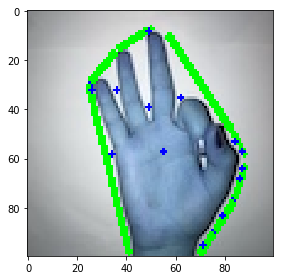

In [373]:
M = cv2.moments(cnt)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])
cv2.circle(img,(cx,cy),1,[0,0,255],-1)
# cv2.Line(img,(cx,cy),1,[0,0,255],-1)
imshow(img)
